# Data Science & Business Analytics Internship : The Spark Foundation

# Author : Sneha.S

# Task 1 : Prediction using supervised ML

* Predict the percentage of a student based on the no.of study hours.
* What will be predicted score if a student studies for 9.25hrs/day?

In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#reading the data of students
student_data = pd.read_csv(r"C:\Users\Sajiv.B\Videos\Task1.csv")
print("Data imported successfully")

#reading the first 10 rows of the dataset
student_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
#check is there any null value in the data set
student_data.isnull == True

False

Since,there is no null data in the dataset so now we can visualise the data now

# Visualising the dataset

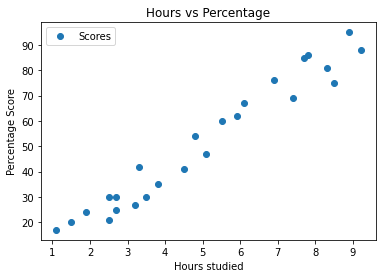

In [8]:
#plotting the distribution of scores
student_data.plot(x="Hours" , y="Scores",style="o")
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

In [9]:
#we can use .corr to determine the correlation between the two variables
student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


From the above plot,we can see the correlation between the number of hours studied and the percentage of score

# Preparing the data

In [10]:
#using iloc function to divide the data into "features"(input) and "labels"(output)
X = student_data.iloc[:,:-1].values
y = student_data.iloc[:, 1].values

In [12]:
#splitting the dataset into training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Training the algorithm

In [13]:
#Training the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#fitting the data into the model
model.fit(X_train, y_train)

print("Training completed.")

Training completed.


# Visualising the model

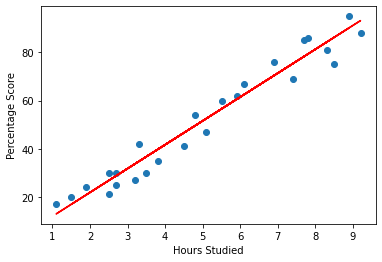

In [14]:
#plotting the regression line using y=mx+c
r_line = model.coef_*X + model.intercept_
plt.scatter(X , y)
plt.plot(X, r_line,color = 'red');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Making Predictions

In [15]:
#making predictions
print(X_test)
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [17]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [18]:
#comparing predicted vs actual marks
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Solving the problem

In [19]:
#testing with our own data
hours = 9.25
ans = model.predict([[hours]])
print("Predicted score if a student for 9.25 hours = {}".format(round(ans[0],4)))

Predicted score if a student for 9.25 hours = 93.6917


# Evaluating the Error

In [20]:
#evaluating the trained model by calculating mean absolute error
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
